**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,0.985152,-2.408867,1.373587,1.763579,0.285327,0.945527,-0.250914,0.534074,0.341867,-0.093459,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,0.253297,-2.169046,2.724520,0.955362,0.338823,0.659885,0.381967,0.159690,-0.090632,-0.051795,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,1.133246,-1.689502,2.537282,1.566142,0.200226,0.148113,0.391597,-0.454222,-0.449532,-0.107163,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,-0.342078,1.228923,-2.422949,1.080143,1.809726,0.014903,1.083481,-0.313433,0.824736,0.492718,-0.108758,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0
9964,14864,-1.747939,3.712444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**CREDITCARD DATASET INFORMATION**



In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [6]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**distribution of legit transactions & fraudulent transactions**

In [7]:
credit_card_data['Class'].value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

**This Dataset is highly unblanced**

**0 --> Normal Transaction**

**1 --> fraudulent transaction**

**Separation of data for analysis**

In [11]:
legitimate = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legitimate.shape)
print(fraud.shape)

(9926, 31)
(38, 31)


In [13]:
# statistical measures of the data
legitimate.Amount.describe()

count    9926.000000
mean       62.919501
std       184.041297
min         0.000000
25%         5.172500
50%        15.950000
75%        51.067500
max      7712.430000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [15]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,5921.607697,-0.235577,0.266833,0.934388,0.239735,-0.041743,0.140925,-0.057661,-0.069971,0.813003,-0.198659,0.744289,-1.235943,0.850165,0.738842,-0.127278,0.008677,0.341282,-0.010333,-0.069995,0.026103,-0.055139,-0.152043,-0.033460,0.023142,0.087567,0.107554,0.003624,0.001701,62.919501
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,-6.319996,6.389743,-9.955713,0.399640,-9.686695,-0.265487,-4.447208,-6.054725,-1.684315,0.126903,0.467700,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


**Under-Sampling**

**Building a sample dataset which contains similar distribution of normal transactions and Fraudulent Transactions**

**Number of Fraudulent Transactions --> 38**

In [17]:
legitimate_sample = legitimate.sample(n=38)

**Concatenation of two new dataframes**

In [18]:
new_creditcarddataset = pd.concat([legitimate_sample, fraud], axis=0)

In [19]:
new_creditcarddataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8297,11081,1.203371,-0.094158,0.878146,0.214596,-0.826228,-0.521950,-0.581536,-0.019889,1.570057,-0.333254,2.233159,-2.006580,1.090885,1.793776,-0.052550,0.713352,0.077690,0.727238,-0.108643,-0.108952,-0.022083,0.130255,-0.020366,0.342156,0.156512,1.015441,-0.097320,-0.005596,15.95,0.0
2852,2423,1.333728,0.232426,-1.708410,-0.070780,2.556949,3.062569,-0.034007,0.647466,-0.400591,0.108193,-0.146369,0.006931,-0.117309,0.718184,0.876810,0.112249,-0.808421,0.082568,0.120007,-0.037069,-0.051475,-0.243130,-0.179704,1.009990,1.009982,-0.280482,-0.005862,0.003838,0.89,0.0
8732,11863,-0.341107,0.709797,1.987572,-0.378388,-0.452188,-1.067919,0.346230,-0.164259,1.127703,-1.026675,0.777221,-2.722236,1.209723,1.569017,0.324276,0.196095,0.532616,-0.022466,-0.133192,-0.055242,-0.179012,-0.348526,0.015611,0.682394,-0.426848,0.805541,-0.051961,0.047445,12.28,0.0
2315,1858,-0.948693,0.545139,2.122885,-0.117245,0.475689,0.581636,0.705228,-0.192508,0.285409,0.136928,0.723201,0.011588,-1.314307,-0.396912,-0.761915,-0.651859,-0.105263,-0.174259,0.526157,-0.027009,-0.050315,0.218779,-0.417297,-0.279094,0.327002,0.413415,-0.718628,-0.365488,6.97,0.0
2983,2532,1.191047,0.129128,0.314928,0.946240,-0.315250,-0.421447,-0.092692,0.065947,0.054931,0.207552,0.771437,-0.032789,-1.558779,0.823578,0.518212,0.540125,-0.754646,0.630174,0.047287,-0.197182,-0.035299,-0.209472,-0.063390,-0.058065,0.498218,-0.431416,0.005936,0.010553,14.95,0.0


In [20]:
new_creditcarddataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9035,12597,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,11.669205,-17.228662,0.055572,-18.493773,-0.304172,-10.629497,-14.441211,-5.105486,1.270226,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.0,1.0
9179,13126,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,10.446847,-15.479052,0.734442,-13.883779,0.821440,-11.911483,-18.103004,-6.837835,3.126929,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.0,1.0
9252,13323,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,11.228470,-17.131301,-0.169401,-18.049998,-1.366236,-9.723565,-14.744902,-5.247301,-0.574675,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.0,1.0
9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,-11.797181,11.277921,-16.728339,0.241368,-17.721638,-0.387300,-10.322017,-13.959085,-5.030710,1.197266,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.0,1.0
9509,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,11.152491,-16.558197,0.302645,-17.475921,-0.412393,-10.222203,-13.799148,-5.008585,1.162026,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.0,1.0


In [21]:
new_creditcarddataset['Class'].value_counts()

1.0    38
0.0    38
Name: Class, dtype: int64

In [24]:
new_creditcarddataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7267.368421,-0.044182,0.356727,0.807010,0.417849,-0.241569,0.036720,-0.217943,0.117592,1.125985,-0.054835,0.951650,-1.287053,0.780727,0.713307,-0.372113,-0.057397,0.524827,0.129390,0.096867,0.01111,-0.147080,-0.099459,-0.038619,-0.079267,0.123165,0.193081,0.052944,-0.047408,38.897105
1.0,9063.157895,-1.796662,3.810809,-6.415255,5.618146,-1.247563,-2.111328,-3.777261,1.150469,-2.276505,-6.319996,6.389743,-9.955713,0.399640,-9.686695,-0.265487,-4.447208,-6.054725,-1.684315,0.126903,0.46770,0.741934,-0.164628,-0.024469,-0.371142,0.018063,0.310646,0.525443,0.355663,75.730526


**Splitting the dataset into  required Features & Targets**

In [25]:
X = new_creditcarddataset.drop(columns='Class', axis=1)
Y = new_creditcarddataset['Class']

In [26]:
print(X)

       Time        V1        V2  ...       V27       V28  Amount
8297  11081  1.203371 -0.094158  ... -0.097320 -0.005596   15.95
2852   2423  1.333728  0.232426  ... -0.005862  0.003838    0.89
8732  11863 -0.341107  0.709797  ... -0.051961  0.047445   12.28
2315   1858 -0.948693  0.545139  ... -0.718628 -0.365488    6.97
2983   2532  1.191047  0.129128  ...  0.005936  0.010553   14.95
...     ...       ...       ...  ...       ...       ...     ...
9035  12597 -2.589617  7.016714  ...  1.934221  0.789687    1.00
9179  13126 -2.880042  5.225442  ...  1.427713  0.583172    1.00
9252  13323 -5.454362  8.287421  ...  1.574715  0.808725    1.00
9487  14073 -4.153014  8.204797  ...  1.627209  0.723235    1.00
9509  14152 -4.710529  8.636214  ...  1.605958  0.721644    1.00

[76 rows x 30 columns]


In [27]:
print(Y)

8297    0.0
2852    0.0
8732    0.0
2315    0.0
2983    0.0
       ... 
9035    1.0
9179    1.0
9252    1.0
9487    1.0
9509    1.0
Name: Class, Length: 76, dtype: float64


**Split the data into Training data & Testing Data**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(76, 30) (60, 30) (16, 30)


**Model Training**

**Logistic Regression**

In [30]:
trainedmodel = LogisticRegression()

In [53]:
# training the Logistic Regression Model with Training Data
trainedmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluating the model**

**Accurate Score**

In [33]:
X_train_prediction = trainedmodel.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

**Accuracy of training data**

In [35]:
print('Accuracy of Training data : ', training_data_accuracy)

Accuracy of Training data :  1.0


In [36]:
X_test_prediction = trainedmodel.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

**Accuracy of test data**

In [37]:
print('Accuracy score of Test Data : ', test_data_accuracy)

Accuracy score of Test Data :  0.9375


**DATA VISUALIZATION**

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings(action="ignore")

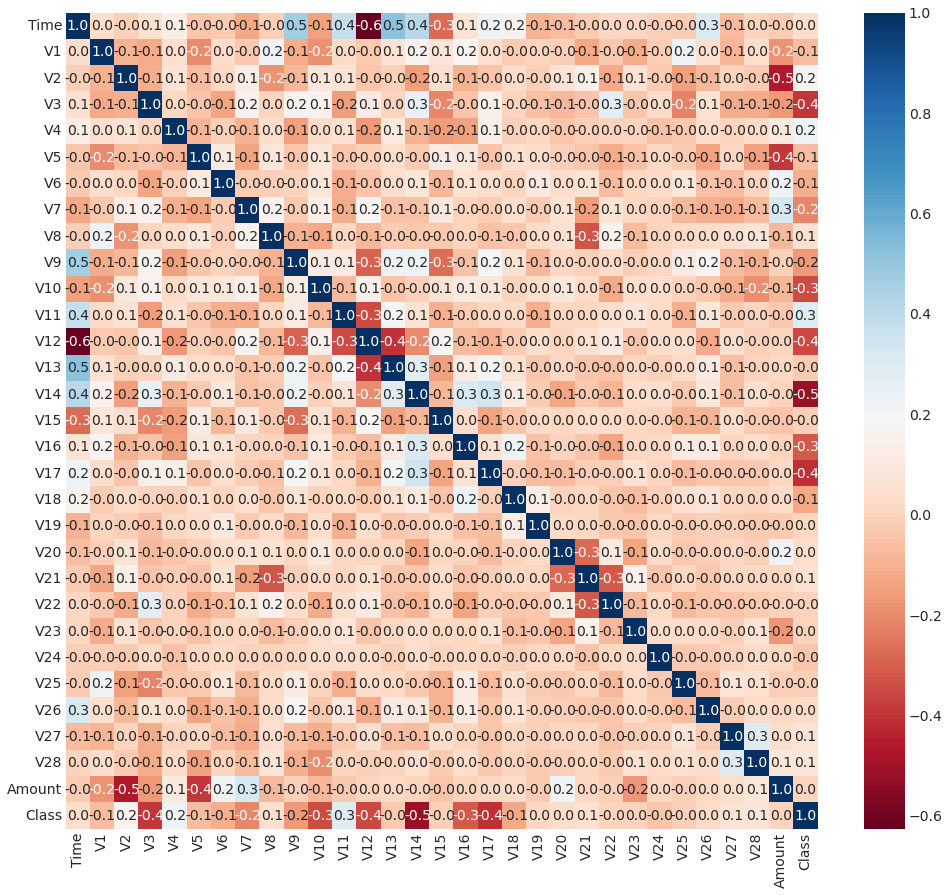

In [40]:
plt.figure(figsize=(15,14))
sns.heatmap(credit_card_data.corr(), annot=True, fmt=".1f",cmap="RdBu")

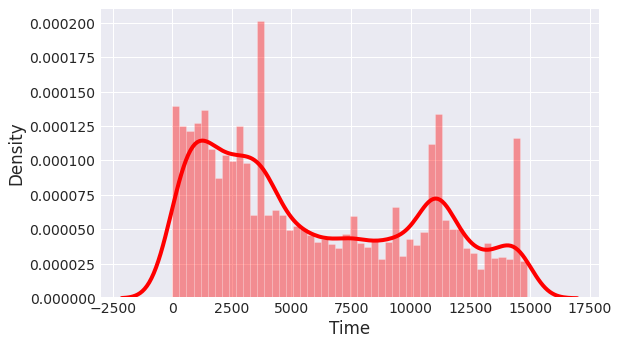

In [41]:
plt.figure(figsize=(8,5))
sns.distplot(credit_card_data["Time"],kde=True, bins=50,color="red")

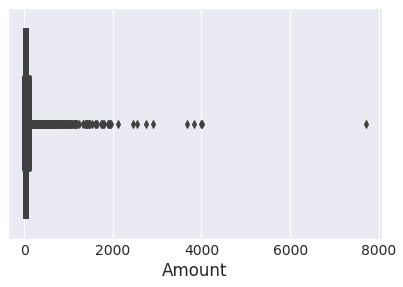

In [42]:
sns.boxplot(credit_card_data["Amount"],orient="h")

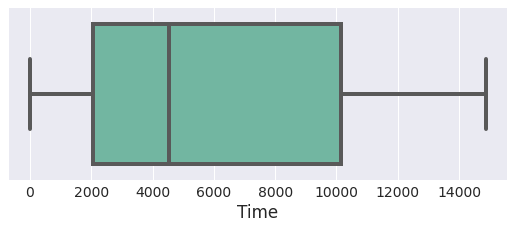

In [43]:
plt.figure(figsize=(8,3))
sns.boxplot(credit_card_data["Time"],orient="h",palette="Set2")

Text(0.5, 1.0, 'Countplot of Target Variable')

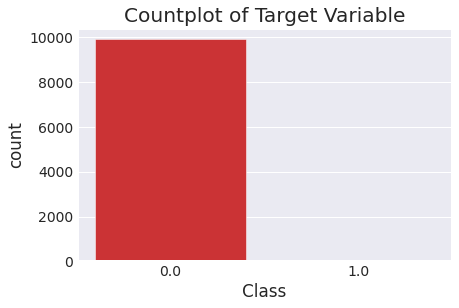

In [44]:
sns.countplot(credit_card_data["Class"],palette="Set1")
plt.title("Countplot of Target Variable")